# Multi-Armed Bandits

Suppose you are at favorite casino a are $k$-different slot machines. Each machine has ouput a reward according to an unknown distribution. In multi-armed bandit problem, an agent (or a player) has $k$ different actions with an associated expected reward value. Suppose $A_t=a$ denotes the action taken time $t$ and a associated reward $R_t$. The value of action $a$ is denoted by:
$$q(a) = \mathbb{E}[R_t|A_t=a] $$
Since the distribution is unknown to the agent, the estimate of $q(a)$ required which will be denoted by $Q(a)$.

### Goal
The goal of any gambler is to minimize regret, and similarly an agent faced with a multi-armed bandit problem wants to minimize regret. Regret $\rho$ after $T$ rounds is defined as follows:

$$\rho=Tq^{\star}-\sum_{t=1}^T R_t $$

where $q^{\star} = \max_a q(a)$. The regret metric accounts for the disparity between the maximal expected reward overall $q(a)$ and the accumulated rewards.

### Approach 

A plausible approach could be a greed approach, in which given the current estimates of $Q(a)$, the action is decided via the following policy:

$$A_t=\text{argmax}_aQ(a)$$

Such a strategy does not allow for exploration of different actions and also, the agent becomes dependent on initial conditions. Instead we allow the agent to make a random selection among the $k$ different actions with a probability $\varepsilon$. Such algorithms are dubbed $\varepsilon$-greedy algorithms

### Estimating $Q(a)$

The initial estimate of $Q(a)$ can be initialized to encode prior beliefs. Since $Q(a)$ is an estimate of $q(a)$, it makes sense that the sample mean of the rewards be a sufficient estimator of $q(a)$. An efficient streaming algorithm for estimating the sample mean is given by:

$$N(A) \gets N(a)+1 $$

$$Q(A) \gets Q(a) + \frac{1}{N(a)} (R-Q(a)) $$

where $N(A)$ is number of occurrences of action A.

### $\varepsilon$-Greedy Algorithm

1. Initialize for $k=1$ to $a$:
    2.         $Q(A)\gets 0$
    3.         $N(A)\gets 0$
2. for $t=1$ to $T$ rounds:

    A.$A_t\gets \begin{cases} \text{argmax}_a Q(a) \quad \text{with probability } 1-\varepsilon \\
        \text{a random action} \quad \text{with probability } \varepsilon \end{cases}$
        
    B.$R_t \gets \text{bandit}(A)$
    
    C.$N(A) \gets N(a)+1 $
    
    D.$Q(A) \gets Q(a) + \frac{1}{N(a)} (R_t-Q(a)) $
    
    
### Applications

Multi-Armed bandits appear in the applications such as A/B testing, portfolio design, and etc. For more information, see references [2] and [3].

### Experiments

For the experiments below, the bandit will have $k=10$ actions. The bandit will output a reward with the following distribution $\mathcal{N}(\frac{a}{10},1)$ for the $a^{\text{th}}$ action.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
class EpsilonGreedy_Strategy(object):
    def __init__(self,k,eps):
        self.k=k
        self.Q=np.zeros(k)
        self.N=np.zeros(k)
        self.eps=eps
        
    def update(self,R,a):
        self.N[a]+=1
        self.Q[a]=self.Q[a]+(1./self.N[a])*(R-self.Q[a])
    
    def choose_action(self):
        if np.random.rand()<1-self.eps:
            return self.Q.argmax()
        else:
            return np.random.randint(0,k)

        
if __name__=="__main__":
    import matplotlib.pyplot as plt
    
    k=10
    R=(np.array(range(k)))/float(k)
    
    def bandit_k(a,R):
        return np.random.randn()+R[a]
    
    
    
    base_eps=float(1)
    T=int(1e6)
    runs=7
    A_player=[]
    R_player=[]
    
    for r in xrange(0,runs):
        A_player.append(np.zeros(T))
        R_player.append(np.zeros(T))
        eps=base_eps/np.power(10,r)
        player=EpsilonGreedy_Strategy(k,eps)
        for i in xrange(0,T):
            A=player.choose_action()
            A_player[r][i]=A
            R_out=bandit_k(A,R)
            R_player[r][i]=R_out
            player.update(R_out,A)

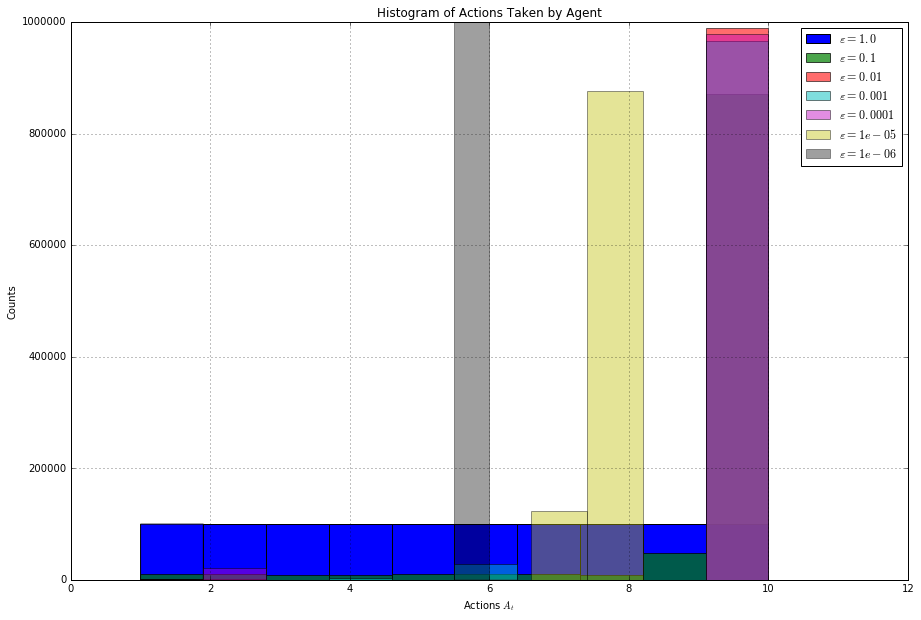

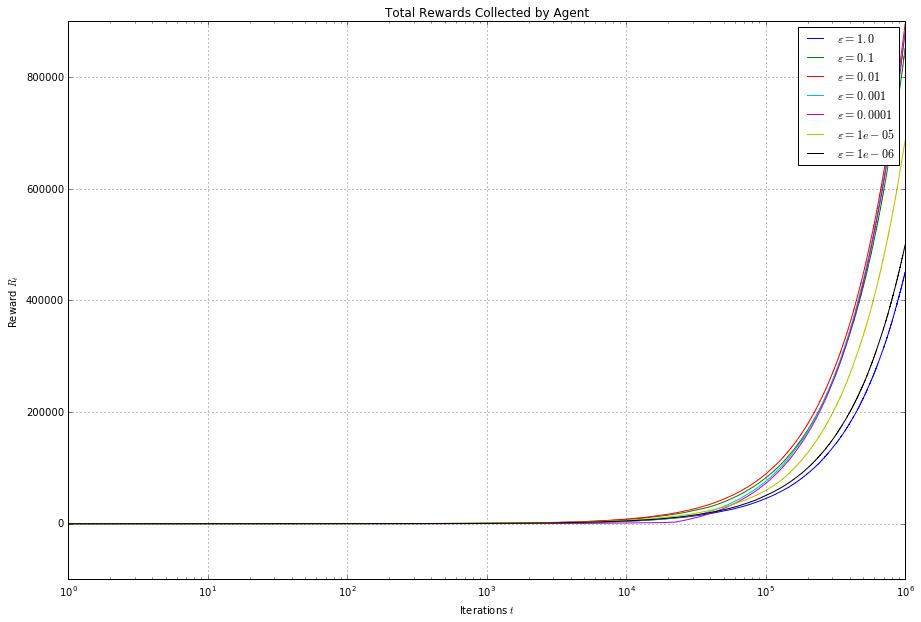

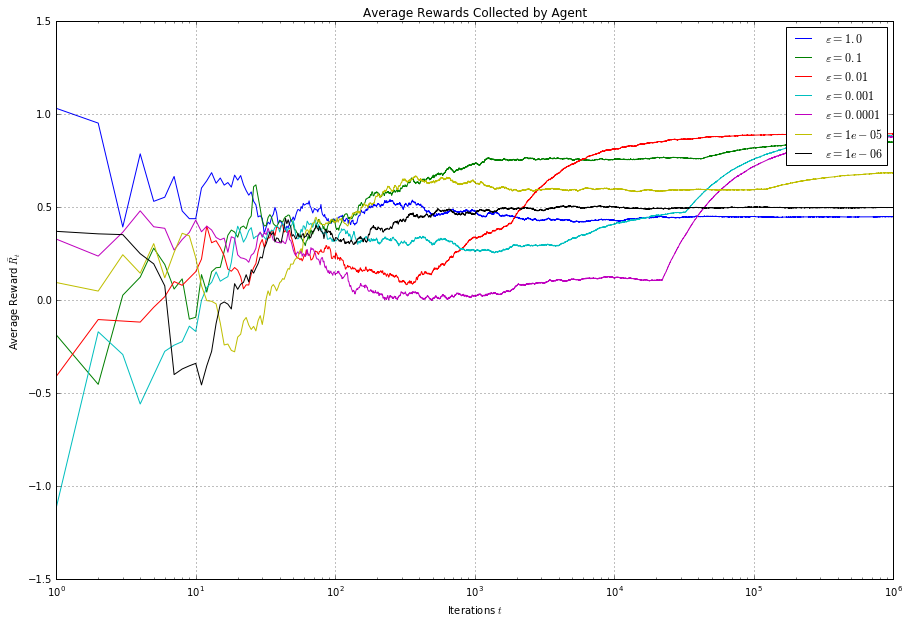

In [3]:
    plt.figure(figsize=(15,10))
    for r in xrange(runs):
        eps=base_eps/np.power(10,r)
        plt.hist(A_player[r]+1,bins=10,label=r'$\varepsilon='+str(eps)+'$',alpha=1./np.sqrt(r+1))
    plt.xlabel(r'Actions $A_t$')
    plt.ylabel(r'Counts')
    plt.title('Histogram of Actions Taken by Agent')
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,10))
    for r in xrange(runs):
        eps=base_eps/np.power(10,r)
        tot_R=R_player[r].cumsum()
        plt.semilogx(tot_R,label=r'$\varepsilon='+str(eps)+'$')
    plt.xlabel(r'Iterations $t$')
    plt.ylabel(r'Reward $R_t$')
    plt.title('Total Rewards Collected by Agent')
    plt.grid()
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(15,10))
    for r in xrange(runs):
        eps=base_eps/np.power(10,r)
        tot_R=R_player[r].cumsum()
        avg_R=tot_R/(np.arange(1,T+1)*1.)
        plt.semilogx(avg_R,label=r'$\varepsilon='+str(eps)+'$')
    plt.xlabel(r'Iterations $t$')
    plt.legend()
    plt.grid()
    plt.ylabel(r'Average Reward $\bar{R}_t$')
    plt.title('Average Rewards Collected by Agent')
    plt.show()
    
    

### References:

1. Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction Second Edition
2. https://support.google.com/analytics/answer/2844870?hl=en
3. https://en.wikipedia.org/wiki/Multi-armed_bandit